<a href="https://colab.research.google.com/github/Navaneeth-ram/Iterative-Learning/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Getting the dataset

mydata=pd.read_csv("/content/heart.csv")
df=mydata.iloc[:,:]
y=df.iloc[:,-1]
X=df.iloc[:,:- 1]
X.head()

#Basic Data Preprocessing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

# Scaling of Data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [73]:
mydata.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output
0,67,0,2,115,564,0,0,160,0,1.6,1
1,65,0,2,140,417,1,0,157,0,0.8,1
2,56,0,0,134,409,0,0,150,1,1.9,0
3,63,0,0,150,407,0,0,154,0,4.0,0
4,62,0,0,140,394,0,0,157,0,1.2,1


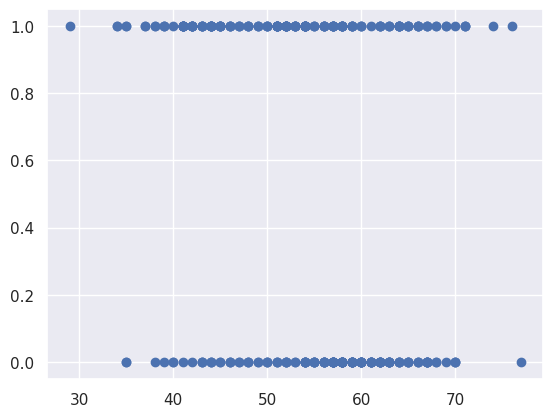

In [21]:
#Scatter plot between Age and Output
plt.scatter(df.age,df.output);

In [18]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak
0,2.376574,0.678551,-0.930861,-0.405620,1.080286,-0.424538,-0.988455,0.579964,1.543805,-0.884898
1,0.433410,0.678551,-0.930861,2.314891,1.486804,-0.424538,-0.988455,-0.424737,1.543805,1.906494
2,-1.941569,0.678551,0.977874,-0.103341,0.082469,-0.424538,0.904530,1.721670,-0.647750,1.988594
3,-1.185894,0.678551,-0.930861,-0.707898,-1.414257,-0.424538,0.904530,-0.242064,1.543805,1.413896
4,0.865224,0.678551,-0.930861,0.501217,-1.081652,-0.424538,-0.988455,-0.242064,1.543805,2.399093


In [19]:
y_train.head()

37     0
16     0
126    1
291    0
273    0
Name: output, dtype: int64

In [20]:
#Importing model and performance metrics libraries

from sklearn.linear_model import LogisticRegression

#Fitting the model to X_train and y_train
model= LogisticRegression()
model.fit(X_train,y_train)

#Doing prediction on X_test

y_pred= model.predict(X_test)

0.81

In [65]:
#Calculating Null Accuracy
null_accuracy=y.value_counts().head(1)/len(y)
null_accuracy

1    0.544554
Name: output, dtype: float64

In [66]:
#Calculating Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.81

In [67]:
#Importing confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[33,  7],
       [12, 48]])

In [68]:
True_Negative = cm[0,0]
True_Negative

33

In [69]:
True_positive= cm[1,1]
True_positive

48

In [70]:
False_positive= cm[0,1]
False_positive

7

In [71]:
False_negative=cm[1,0]
False_negative

12

In [72]:
## Calculating Sensitivity
Sensitivity=True_positive/(True_positive+False_negative)
Sensitivity

0.8

In [35]:
##Calculating Specificity
Specificity=True_Negative/(True_Negative+False_positive)
Specificity

0.825

In [36]:
#Calculating precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.8727272727272727

In [38]:
#Calculating FPR
False_Positive_rate= False_positive/(False_positive+True_Negative)
False_Positive_rate

0.175

In [39]:
#Calculating F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8347826086956521

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.87      0.80      0.83        60

    accuracy                           0.81       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100



In [52]:
print(y_pred)

[1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1]


In [53]:
y_pred_prob= model.predict_proba(X_test)

In [54]:
y_pred_prob[:20]

array([[0.23806541, 0.76193459],
       [0.4067876 , 0.5932124 ],
       [0.5755428 , 0.4244572 ],
       [0.51121844, 0.48878156],
       [0.99359072, 0.00640928],
       [0.86049109, 0.13950891],
       [0.88275051, 0.11724949],
       [0.54033116, 0.45966884],
       [0.92604467, 0.07395533],
       [0.74519029, 0.25480971],
       [0.16183676, 0.83816324],
       [0.97742985, 0.02257015],
       [0.97273129, 0.02726871],
       [0.35527551, 0.64472449],
       [0.15400118, 0.84599882],
       [0.06036446, 0.93963554],
       [0.02467473, 0.97532527],
       [0.97242198, 0.02757802],
       [0.97691705, 0.02308295],
       [0.14284878, 0.85715122]])

In [56]:
y_pred_prob=model.predict_proba(X_test)[:,1]
y_pred_prob[:20]

array([0.76193459, 0.5932124 , 0.4244572 , 0.48878156, 0.00640928,
       0.13950891, 0.11724949, 0.45966884, 0.07395533, 0.25480971,
       0.83816324, 0.02257015, 0.02726871, 0.64472449, 0.84599882,
       0.93963554, 0.97532527, 0.02757802, 0.02308295, 0.85715122])

In [58]:
from sklearn.metrics import  roc_auc_score ,roc_curve
roc_curve(y_test,y_pred_prob)

(array([0.   , 0.   , 0.   , 0.025, 0.025, 0.05 , 0.05 , 0.075, 0.075,
        0.1  , 0.1  , 0.125, 0.125, 0.175, 0.175, 0.225, 0.225, 0.3  ,
        0.3  , 0.325, 0.325, 0.4  , 0.4  , 0.525, 0.525, 0.625, 0.625,
        0.725, 0.725, 1.   ]),
 array([0.        , 0.01666667, 0.41666667, 0.41666667, 0.55      ,
        0.55      , 0.56666667, 0.56666667, 0.58333333, 0.58333333,
        0.75      , 0.75      , 0.76666667, 0.76666667, 0.83333333,
        0.83333333, 0.85      , 0.85      , 0.9       , 0.9       ,
        0.91666667, 0.91666667, 0.93333333, 0.93333333, 0.96666667,
        0.96666667, 0.98333333, 0.98333333, 1.        , 1.        ]),
 array([1.99555028, 0.99555028, 0.89146833, 0.89105266, 0.7719368 ,
        0.76193459, 0.74581316, 0.73564726, 0.73145892, 0.72188889,
        0.57794581, 0.57583985, 0.57445664, 0.56619229, 0.46858698,
        0.4244572 , 0.41536724, 0.36954102, 0.28887034, 0.27304728,
        0.26026679, 0.20591265, 0.18134804, 0.06465589, 0.04843756,
      

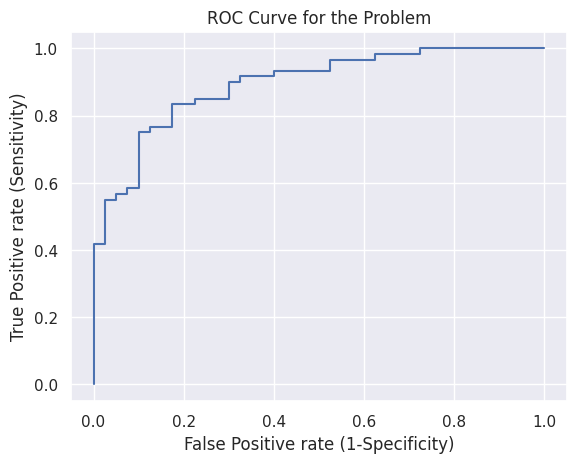

In [74]:
plt.plot(fpr,tpr)
plt.title("ROC Curve for the Problem")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [61]:
roc_auc_score(y_test,y_pred_prob)

0.8933333333333333